<a href="https://colab.research.google.com/github/MayHayun/CordinationGame/blob/main/UFOproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Intro*
We are May ( 212271621 ) and Avichai (209455906) computer science students who are about to graduate and are passionate about data science and about exploring the mysteries of the universe.
Together, we will combine our knowledge in data analysis and research to investigate UFO sightings and hopefully uncover new insights.

In this project, we delve into a dataset [sourced from Kaggle](https://www.kaggle.com/datasets/NUFORC/ufo-sightings?select=complete.csv) containing records of UFO sightings reported around the world. Our aim is to analyze this data to uncover patterns, trends, and anomalies that may provide insights into the existence of UFOs and their potential characteristics.



# The problem
Unidentified Flying Objects (UFOs) have long captured the imagination of humanity, sparking debates, speculation, and fascination about the possibility of extraterrestrial life and advanced technologies beyond our understanding. While many UFO sightings can be attributed to natural phenomena, misidentifications, or hoaxes, there remains a subset of encounters that defy conventional explanation.

By leveraging data analysis and visualization techniques, we seek to address several key questions:

* Existence of UFOs: Is there compelling evidence within the dataset that suggests the existence of unidentified aerial phenomena beyond conventional understanding?

* Spatial Distribution: Where are UFO sightings most prevalent geographically? Are there specific regions or areas that exhibit a higher frequency of sightings?

* Temporal Trends: Have there been notable fluctuations in UFO sightings over time? Are there recurring patterns or seasonal variations in sightings?

* Characteristics of Sightings: What are the common characteristics of UFO sightings, such as shape, duration, and reported behaviors? Are there discernible patterns that may provide clues about the nature of these phenomena?

* Correlation Analysis: Are there any correlations between UFO sightings and factors such as population density, proximity to military installations, or environmental conditions?

By rigorously examining the available data and applying statistical analysis techniques, we aim to shed light on the enigmatic phenomenon of UFO sightings and contribute to the ongoing discourse surrounding the search for extraterrestrial intelligence.

Join us on this intriguing journey as we explore the mysteries of the skies and endeavor to unravel the secrets of unidentified aerial phenomena.


# Data collection: UFO sightings

The dataset used in this analysis contains reported sightings of unidentified flying objects (UFOs)

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_colwidth', None)

ufo_data = pd.read_csv("/content/udo_data.csv",sep=',', on_bad_lines='skip', low_memory=False)
ufo_data.head(5)

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing across the sky &amp; making 90 degree turns on a dime.,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 England,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving the only Edna theater at about 9 PM&#44...we had our bikes and I took a different route home,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/attack aircraft on a solo night exercise&#44 I was at 50&#44000&#39 in a &quot;clean&quot; aircraft (no ordinan,1/22/2004,21.4180556,-157.803611


# Exploring Patterns and Trends in UFO Sightings: A Data Analysis

**UFO sightings by country**

First we shall analyze the distribution of UFO sightings across different countries across the world, The following visualization below presents the distribution of UFO sightings by country:

*   us = United States of America
*   gb = Great Britian
*   de = Germany
*   ca = Canada
*   au = Australia

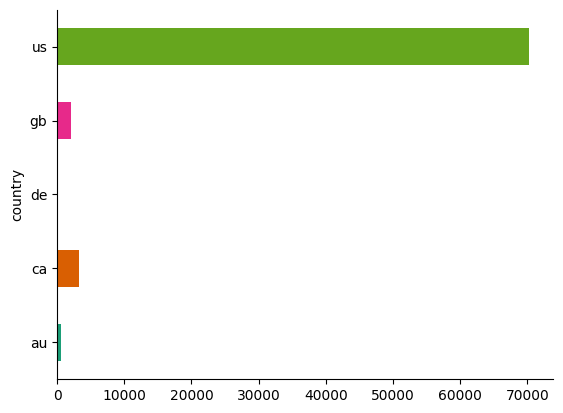

In [5]:
import seaborn as sns
ufo_data.groupby('country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

**Number of UFO sightings over the years**

Next we shall see the sightings disterbution over the last 120 years.
The graph visualizes the number of UFO sightings over time based on available
data. Each data point on the graph represents the count of UFO sightings reported for a specific month and year. The x-axis displays the time period in Year-Month format, while the y-axis represents the corresponding number of sightings.

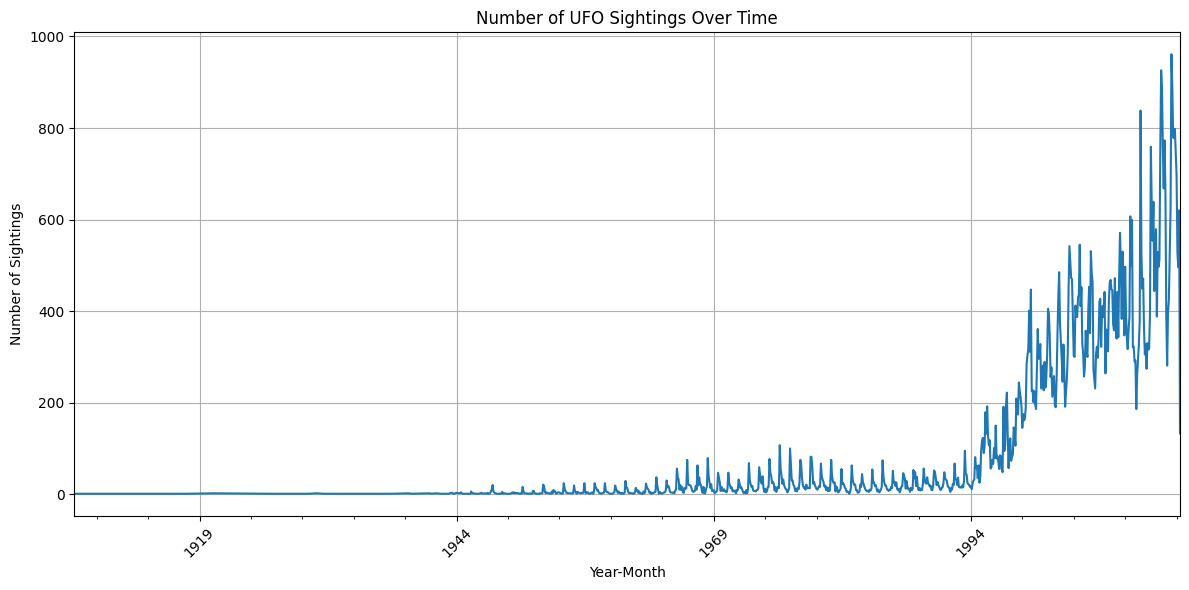

In [7]:
import matplotlib.pyplot as plt

# Assuming you already have ufo_data DataFrame containing the UFO sightings data
# If not, load the data first using pd.read_csv()

ufo_data['datetime'] = ufo_data['datetime'].str.replace('24:00', '00:00')
# Convert the 'datetime' column to datetime format
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'])

# Group by datetime and count sightings
monthly_counts = ufo_data.groupby(ufo_data['datetime'].dt.to_period('M')).size()

# Plot the number of sightings over time
plt.figure(figsize=(12, 6))
monthly_counts.plot()
plt.title('Number of UFO Sightings Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Sightings')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Sightings Throughout Time Intervals**

The graph depicts the distribution of UFO sightings across different time intervals.

The first subplot shows sightings throughout the day, revealing any hourly patterns.

The second subplot illustrates sightings throughout the week, indicating variations across different days.

The third subplot presents sightings throughout the month, highlighting monthly fluctuations.

Lastly, the fourth subplot displays sightings throughout the years covered by the dataset, revealing long-term trends.

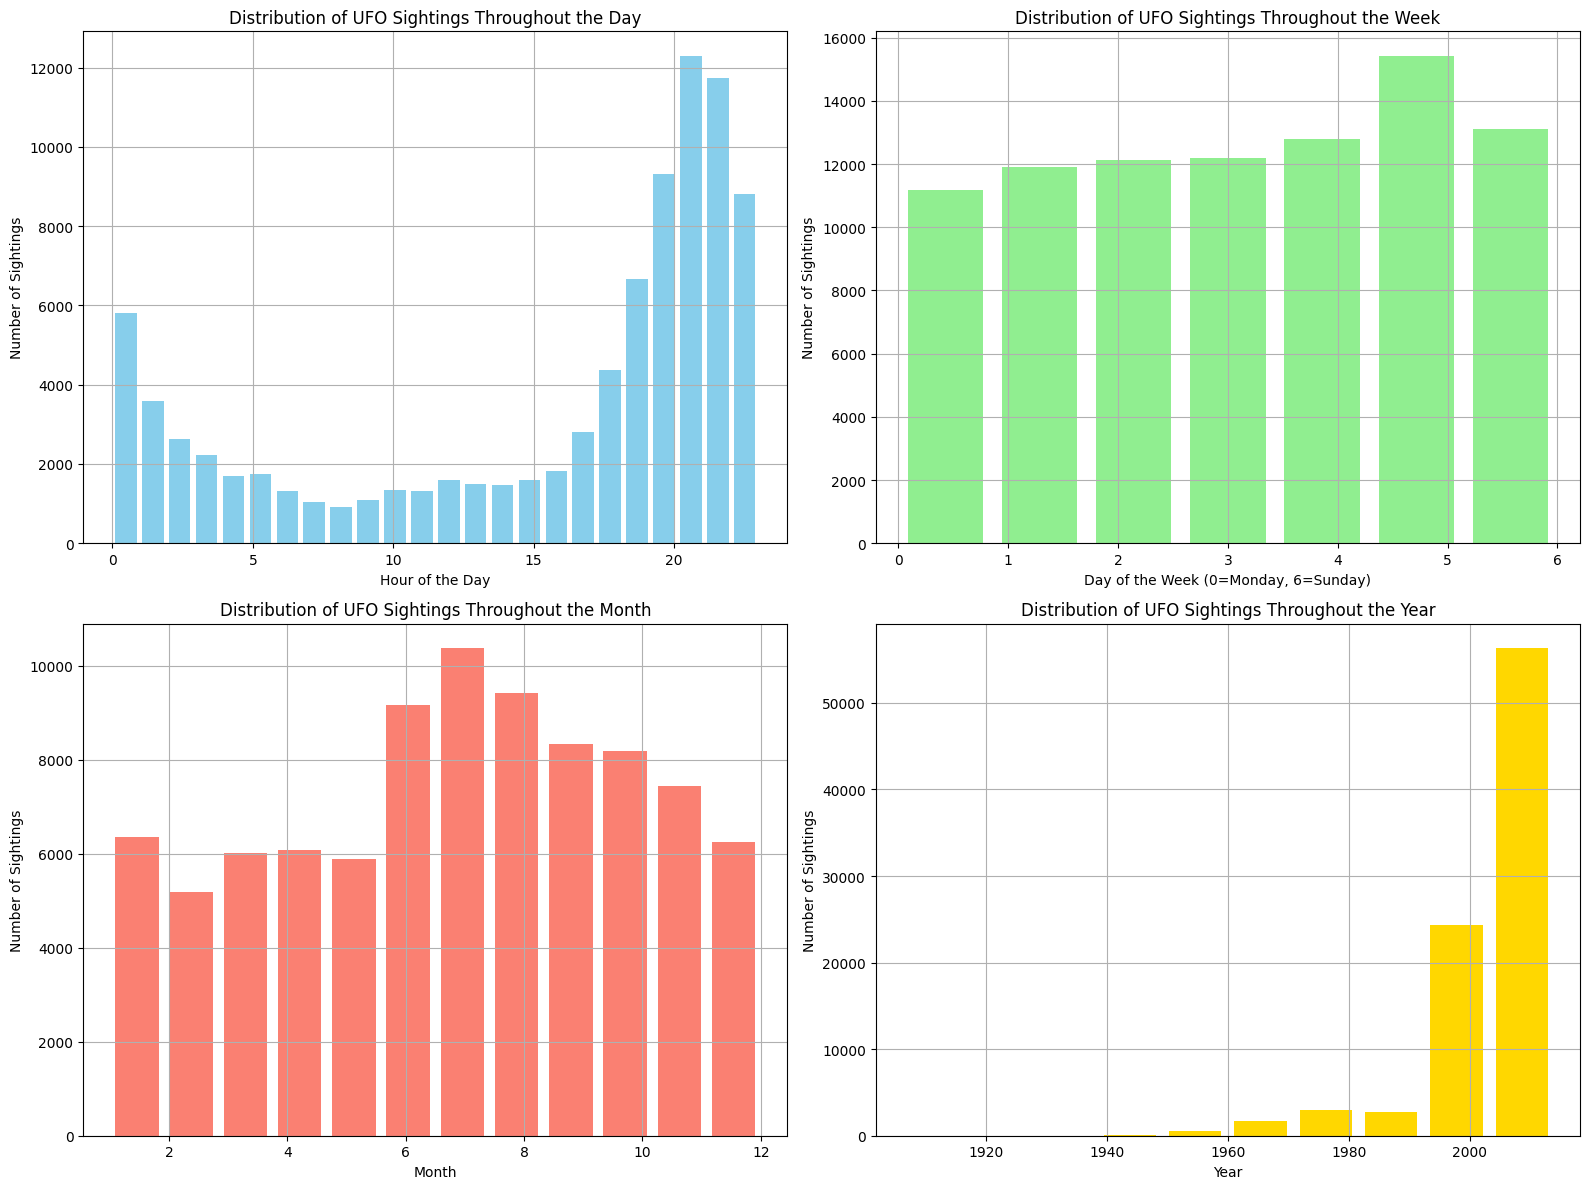

In [ ]:
# Convert the 'datetime' column to datetime format
ufo_data['datetime'] = pd.to_datetime(ufo_data['datetime'], format='%m/%d/%y %H:%M')

# Create separate plots for distribution throughout the day, week, month, and year
plt.figure(figsize=(16, 12))

# Distribution throughout the day
plt.subplot(2, 2, 1)
ufo_data['datetime'].dt.hour.hist(bins=24, rwidth=0.8, color='skyblue')
plt.title('Distribution of UFO Sightings Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sightings')

# Distribution throughout the week
plt.subplot(2, 2, 2)
ufo_data['datetime'].dt.dayofweek.hist(bins=7, rwidth=0.8, color='lightgreen')
plt.title('Distribution of UFO Sightings Throughout the Week')
plt.xlabel('Day of the Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Sightings')

# Distribution throughout the month
plt.subplot(2, 2, 3)
ufo_data['datetime'].dt.month.hist(bins=12, rwidth=0.8, color='salmon')
plt.title('Distribution of UFO Sightings Throughout the Month')
plt.xlabel('Month')
plt.ylabel('Number of Sightings')

# Distribution throughout the year
plt.subplot(2, 2, 4)
ufo_data['datetime'].dt.year.hist(rwidth=0.8, color='gold')
plt.title('Distribution of UFO Sightings Throughout the Year')
plt.xlabel('Year')
plt.ylabel('Number of Sightings')

plt.tight_layout()
plt.show()

**Distribution of UFO Sightings by State:**

This bar chart depicts the distribution of UFO sightings by state. Each bar represents a state, and the height of the bar indicates the number of sightings reported in that state. The x-axis displays the states, while the y-axis represents the corresponding number of sightings. By focusing on the top 10 states with the highest number of sightings, this visualization offers insights into geographic areas where UFO sightings are most frequently reported.

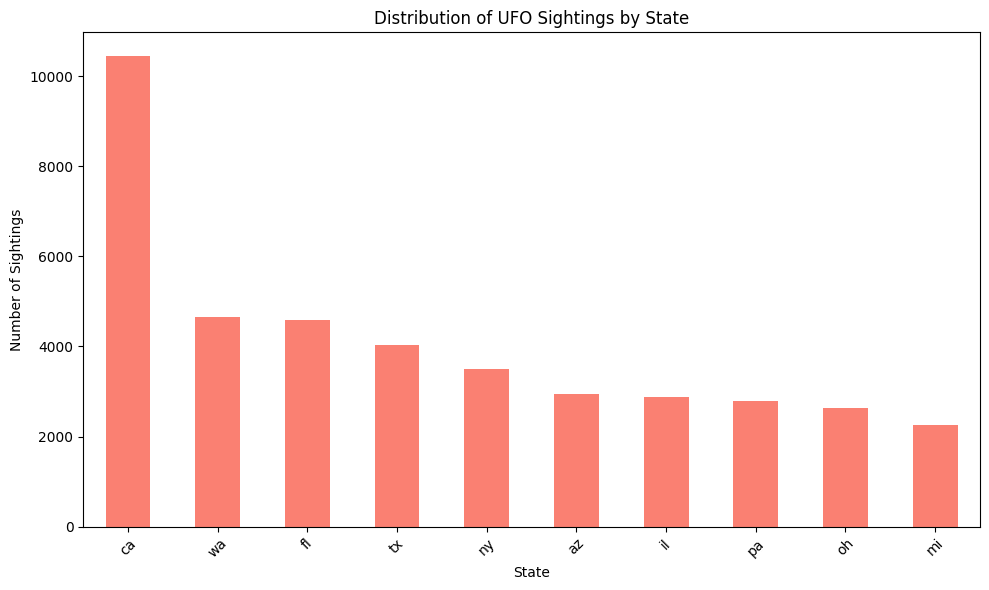

In [12]:
# Distribution by state
state_counts = ufo_data['state'].value_counts().head(10)  # Top 10 states for better visualization
plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of UFO Sightings by State')
plt.xlabel('State')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Distribution of UFO Sightings by City:**

This pie chart showcases the distribution of UFO sightings by city. Each slice of the pie represents a city, and the size of the slice corresponds to the proportion of sightings reported in that city relative to the total. The chart is limited to the top 10 cities with the highest number of sightings for better visualization. By presenting the distribution in a pie chart format, this visualization allows for a quick understanding of the relative contribution of each city to the total number of sightings.

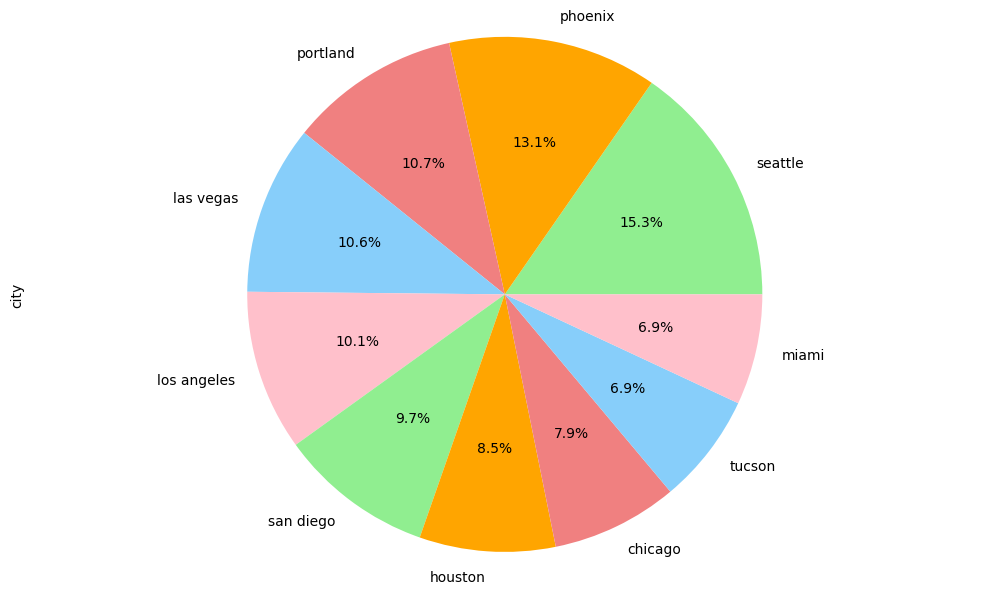

In [14]:
# Distribution by city
city_counts = ufo_data['city'].value_counts().head(10)  # Top 10 cities for better visualization
plt.figure(figsize=(10, 6))
city_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'orange', 'lightcoral', 'lightskyblue', 'pink'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.tight_layout()
plt.show()

**Distribution of UFO Shapes Reported**

This bar chart displays the distribution of different UFO shapes reported in the dataset. Each bar represents a specific shape of UFO, and the height of the bar indicates the number of sightings reported for that shape. The x-axis shows the various UFO shapes, while the y-axis represents the corresponding number of sightings. By visualizing the distribution of UFO shapes, this plot provides insights into the most commonly reported shapes of UFOs. It helps in understanding the prevalence of different UFO shapes among the reported sightings.

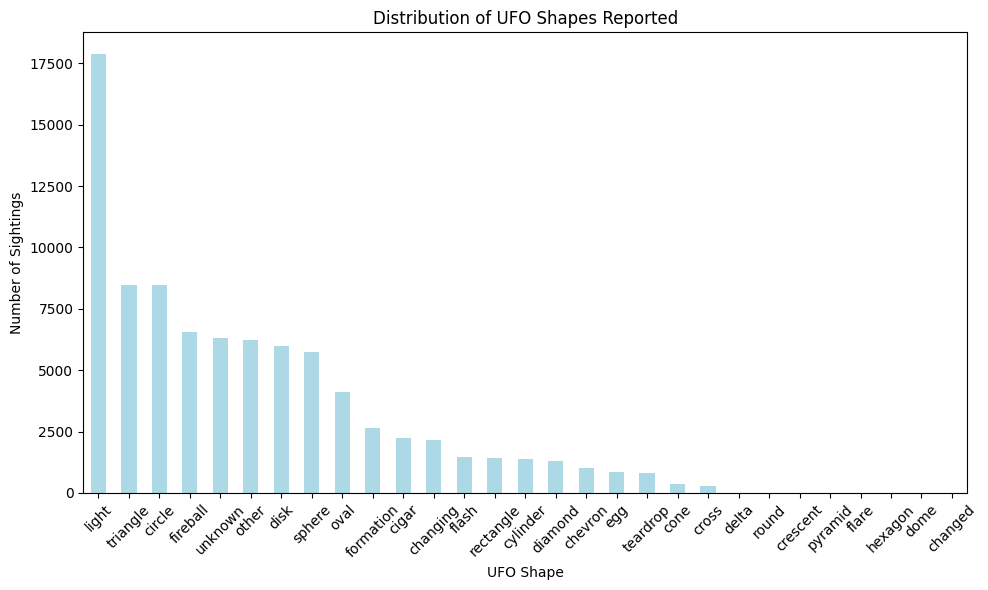

In [15]:
# Plot the distribution of different UFO shapes reported
plt.figure(figsize=(10, 6))
ufo_data['shape'].value_counts().plot(kind='bar', color='lightblue')
plt.title('Distribution of UFO Shapes Reported')
plt.xlabel('UFO Shape')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Frequency of UFO Sightings by Duration Categories**

This bar chart explores the frequency of UFO sightings based on duration categories. The dataset is categorized into different duration categories, such as short, medium, and long, based on predefined duration thresholds. The x-axis represents the duration categories, while the y-axis indicates the corresponding number of sightings. By visualizing the frequency of sightings in each duration category, this plot provides insights into the distribution of UFO sightings based on their reported durations. It helps in understanding the prevalence of sightings across different duration ranges, allowing for further analysis of UFO sighting patterns. Adjustments to the duration thresholds can be made to tailor the analysis to specific criteria or preferences.

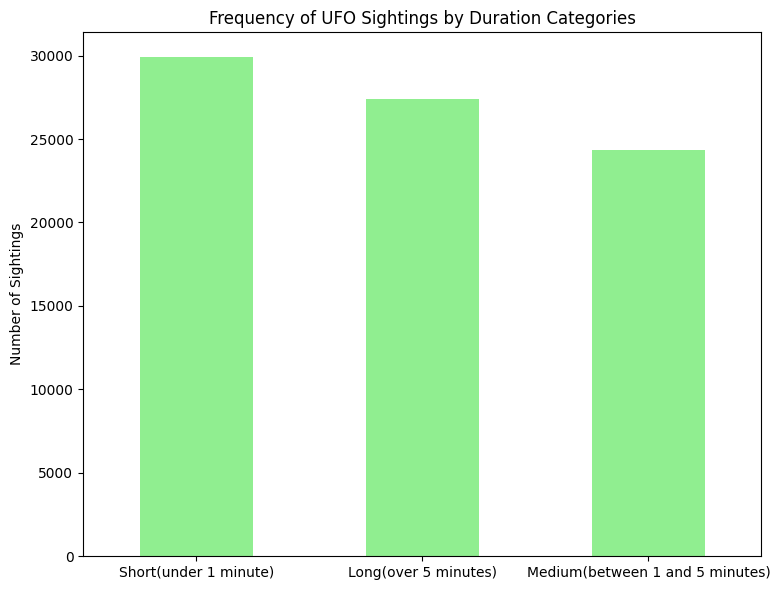

In [22]:
# Convert 'duration_seconds' to numeric
ufo_data['duration (seconds)'] = pd.to_numeric(ufo_data['duration (seconds)'], errors='coerce')

# Define duration categories (you can adjust these thresholds as needed)
short_duration = 60  # seconds
medium_duration = 300  # seconds
# You can set 'long_duration' to any value that suits your dataset

# Create duration categories based on defined thresholds
ufo_data['duration_category'] = pd.cut(ufo_data['duration (seconds)'],
                                       bins=[0, short_duration, medium_duration, float('inf')],
                                       labels=['Short(under 1 minute)', 'Medium(between 1 and 5 minutes)', 'Long(over 5 minutes)'])

# Plot the frequency of sightings based on duration categories
plt.figure(figsize=(8, 6))
ufo_data['duration_category'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Frequency of UFO Sightings by Duration Categories')
plt.ylabel('Number of Sightings')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Correlation Between Reported Duration and Location**

This heatmap visualizes the correlation between reported duration and location variables such as latitude and longitude. Each cell in the heatmap represents the correlation coefficient between two variables, with values ranging from -1 to 1. A value closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. The diagonal cells represent the correlation of each variable with itself, which is always 1. By examining the heatmap, we can identify whether there's any significant correlation between the reported duration and the location variables.

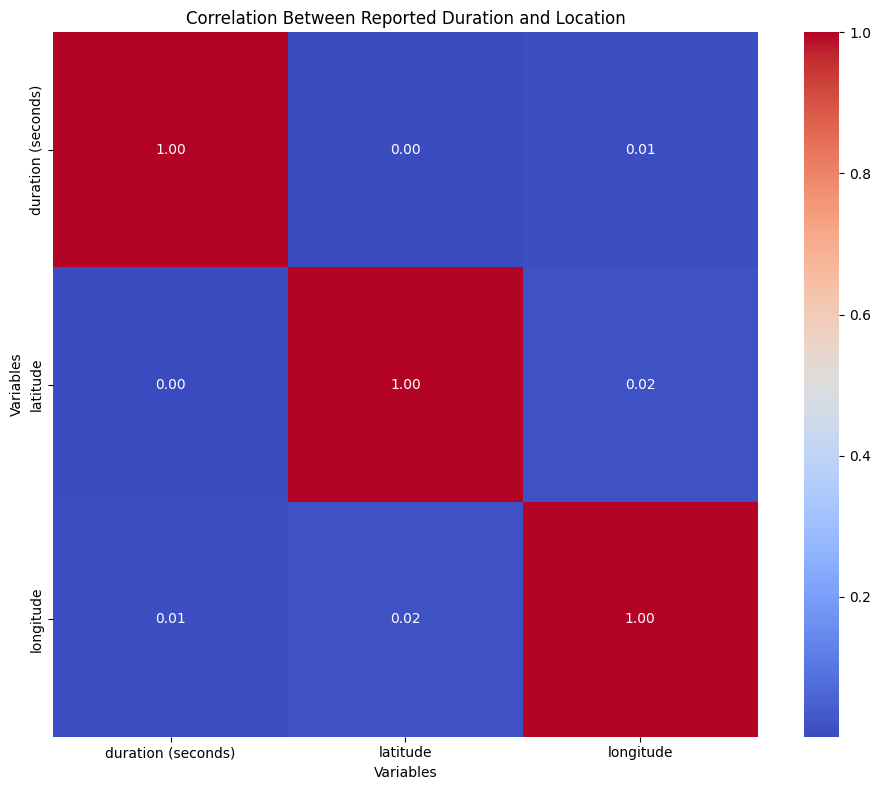

In [24]:
# Select relevant columns for correlation analysis
selected_columns = ['duration (seconds)', 'latitude', 'longitude']

# Calculate the correlation matrix
correlation_matrix = ufo_data[selected_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Between Reported Duration and Location')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.tight_layout()
plt.show()

**Word Cloud of UFO Sightings Comments**

This word cloud visualization displays common themes or keywords found in the 'comments' column of the UFO sightings dataset. By examining the word cloud, we can identify recurring themes or keywords mentioned in the comments, providing insights into the reported sightings. This visualization aids in understanding the most frequently mentioned aspects or descriptions of UFO sightings reported in the dataset.

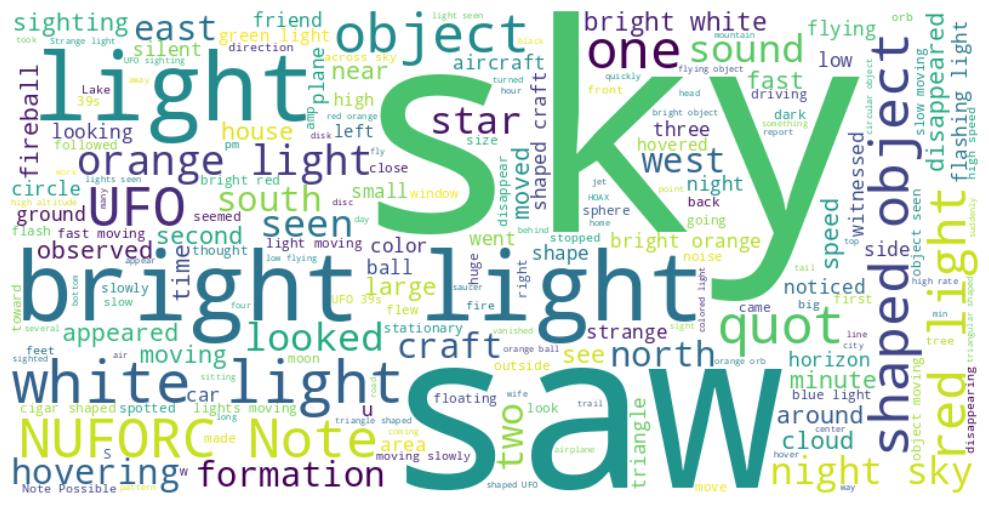

In [27]:
from wordcloud import WordCloud

# Concatenate all comments into a single string
all_comments = ' '.join(ufo_data['comments'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()

# conclusions from analysis

# QA text from last section@@@@@@@@@@@@@@